In [1]:
import cv2 as cv
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tqdm
from numba import jit

In [2]:
BLUR_BODY_DATA_PATH = "data/BlurBody" 
IRONMAN_DATA_PATH = "data/Ironman" 
DOG_DATA_PATH = "data/Dog" 
SURFER_DATA_PATH = "data/Surfer" 
WALKING_DATA_PATH = "data/Walking" 


In [3]:
def read_data(data_path, sep='\t'):
    boxes = pd.read_csv(f"{data_path}/groundtruth_rect.txt", sep=sep, header=None)
    frames = list(sorted(os.listdir(f"{data_path}/img/")))
    return frames, boxes 

In [67]:
def ssd_score(a, b):
    return np.power(a - b, 2).sum()

In [68]:
def absolute_diff(a, b):
    a = cv.cvtColor(a, cv.COLOR_BGR2GRAY)
    b = cv.cvtColor(b, cv.COLOR_BGR2GRAY)
    return np.abs(a-b).sum()

In [69]:
def correlation(a, b):
    return (a * b).sum()

In [89]:
def build_score_map(image, roi, score_function):
    w, h, d = image.shape
    wR, hR, dR = roi.shape

    res = np.zeros((w -wR + 1, h - hR + 1))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            score = score_function(image[i:i+wR, j:j+hR, :], roi)
            res[i, j] = score
    return res

def next_roi(image, roi, score_function):
    wR, hR, dR = roi.shape
    res = build_score_map(image, roi, score_function)
    x, y = np.unravel_index(np.argmin(res),res.shape)
    return y, x, hR, wR, res

def tracker(DATA_PATH, frames, window_init, score_function):
    image = cv.imread(f"{DATA_PATH}/img/{frames[0]}")
    x, y, w, h = window_init
    roi = image[y:y+h, x:x+w]

    img2 = cv.rectangle(image.copy(), (x,y), (x+w,y+h), 255,2)
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.show()

    for i in tqdm.tqdm_notebook(range(len(frames))):
        image = cv.imread(f"{DATA_PATH}/img/{frames[i]}")
        x, y, w, h, score_map = next_roi(image, roi, score_function)
        roi = image[y:y+h, x:x+w]
        img2 = cv.rectangle(image.copy(), (x,y), (x+w,y+h), 255,2)
        plt.figure(figsize=(16, 8))
        plt.subplot(1, 2, 1)
        plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
        plt.subplot(1, 2, 2)
        plt.imshow(score_map, cmap='gray')
        plt.show()

In [90]:
frames, boxes = read_data(SURFER_DATA_PATH)

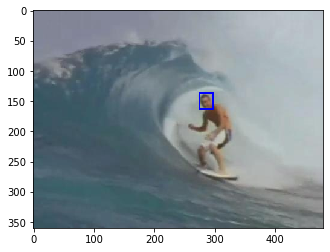

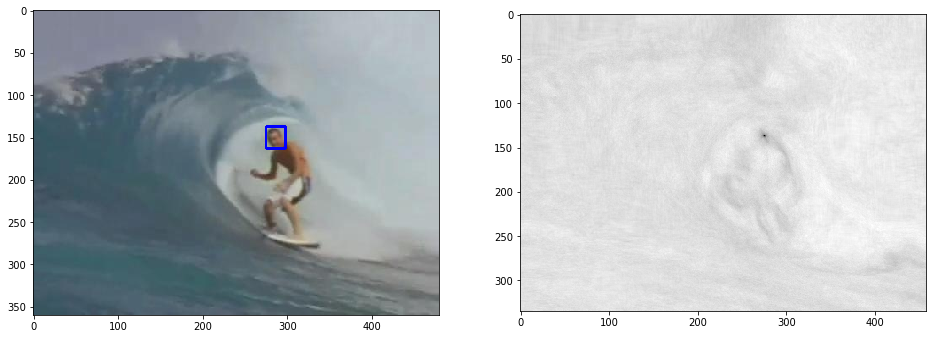

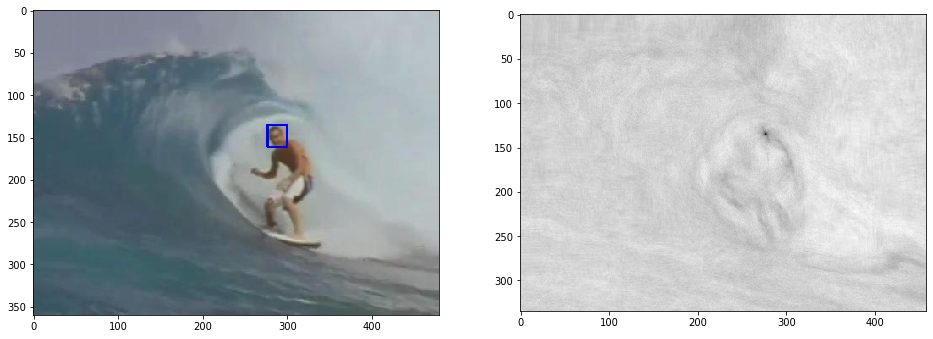

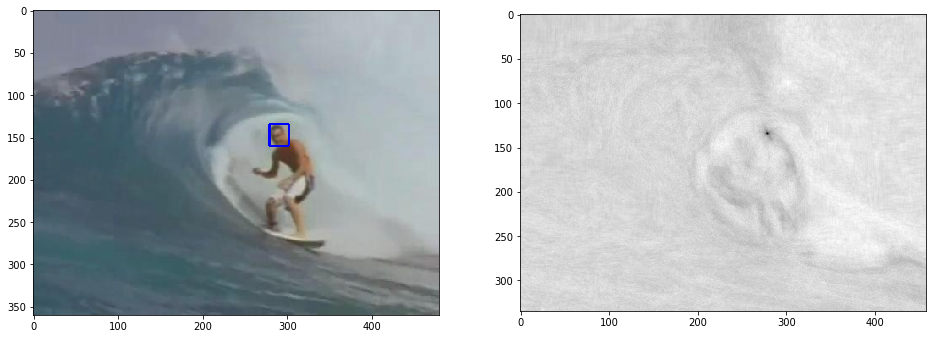

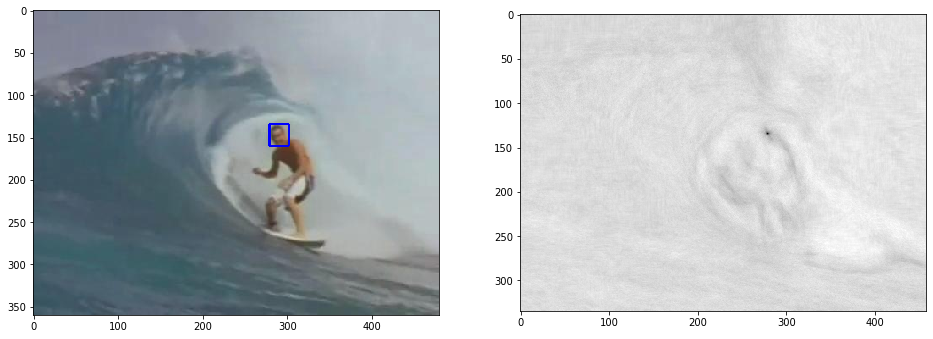

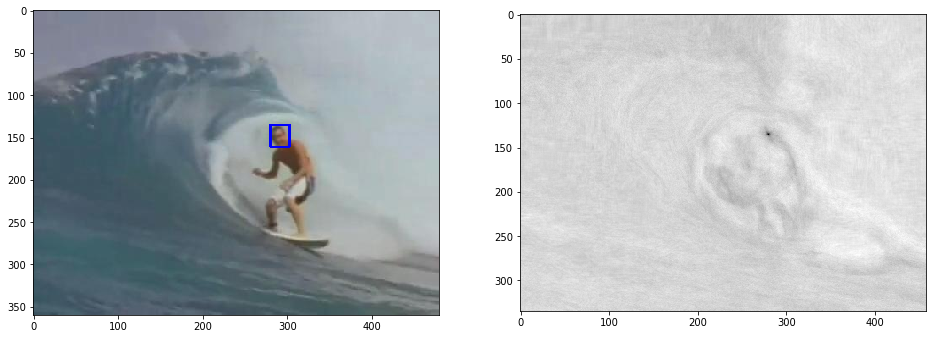

In [92]:
tracker(SURFER_DATA_PATH, frames[:5], boxes.iloc[0], ssd_score)

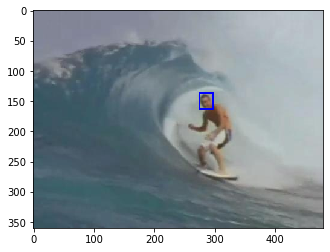

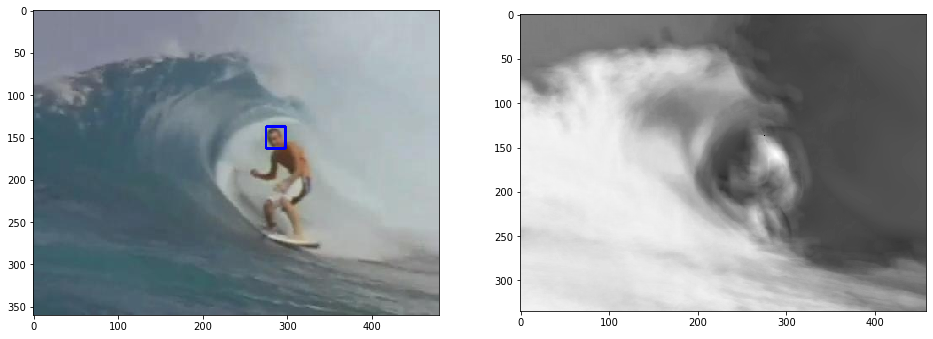

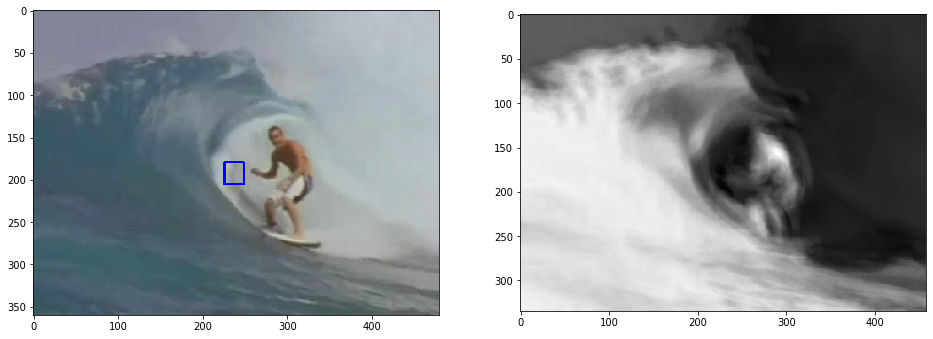

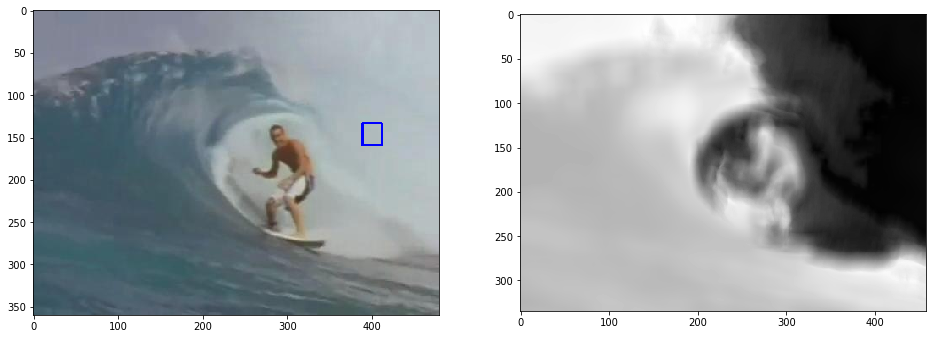

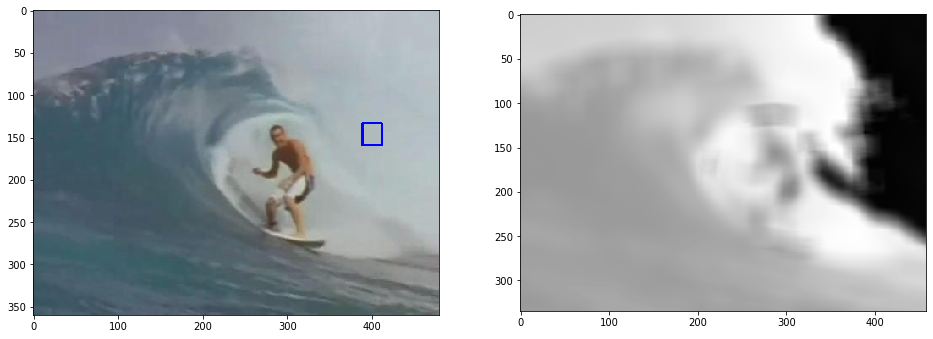

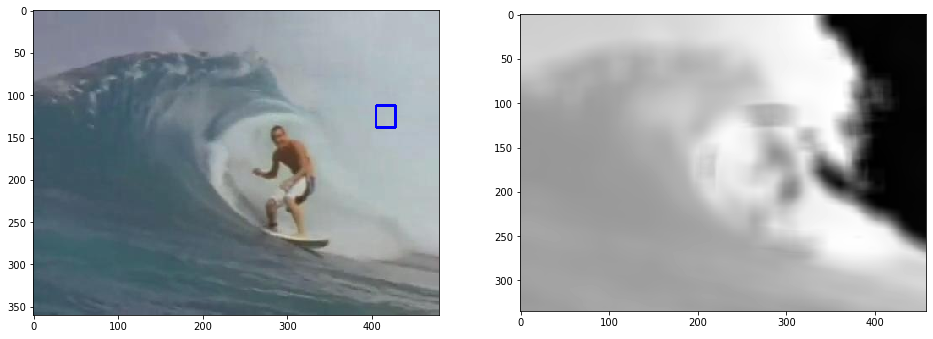

In [96]:
tracker(SURFER_DATA_PATH, frames[:5], boxes.iloc[0], %savesolute_diff)

In [83]:
def ncc_score(a, b, mean):
    a = (a - mean)/(np.sqrt(np.power(a-mean, 2).sum()))
    b = (b - mean)/(np.sqrt(np.power(b-mean, 2).sum()))
    
    return (a * b).sum()

def build_ncc_score_map(image, roi):
    w, h, d = image.shape
    wR, hR, dR = roi.shape
    mean = image.mean()
    res = np.zeros((w -wR + 1, h - hR + 1))
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            score = ncc_score(image[i:i+wR, j:j+hR, :], roi, mean)
            res[i, j] = score
    return res

def ncc_next_roi(image, roi):
    wR, hR, dR = roi.shape
    res = build_ncc_score_map(image, roi)
    plt.imshow(res, cmap='gray')
    plt.show()
    x, y = np.unravel_index(np.argmax(res),res.shape)
    return y, x, hR, wR

In [84]:
def ncc_tracker(DATA_PATH, frames, window_init):
    image = cv.imread(f"{DATA_PATH}/img/{frames[0]}")
    x, y, w, h = window_init
    roi = image[y:y+h, x:x+w]

    img2 = cv.rectangle(image.copy(), (x,y), (x+w,y+h), 255,2)
    plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
    plt.show()

    for i in tqdm.tqdm_notebook(range(len(frames))):
        image = cv.imread(f"{DATA_PATH}/img/{frames[i]}")
        x, y, w, h = ncc_next_roi(image, roi)
        roi = image[y:y+h, x:x+w]
        img2 = cv.rectangle(image.copy(), (x,y), (x+w,y+h), 255,2)
        plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
        plt.show()

In [94]:
frames, boxes = read_data(SURFER_DATA_PATH)

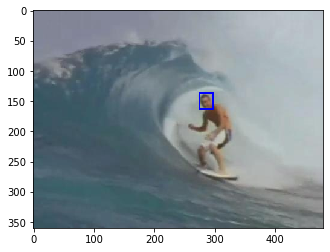

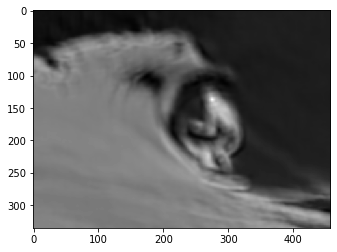

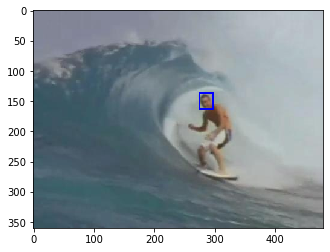

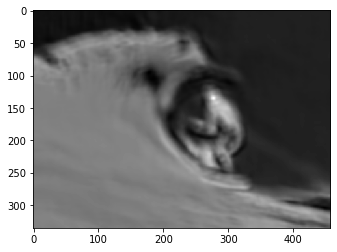

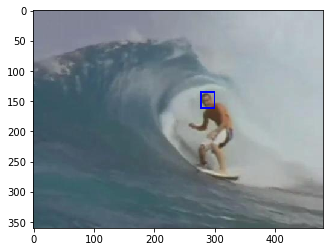

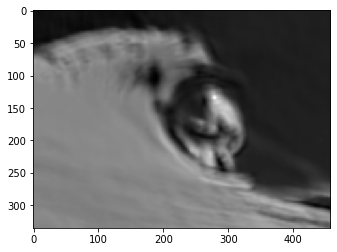

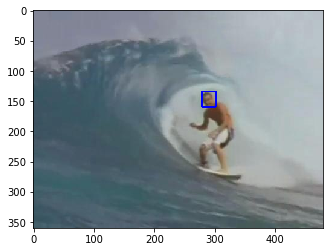

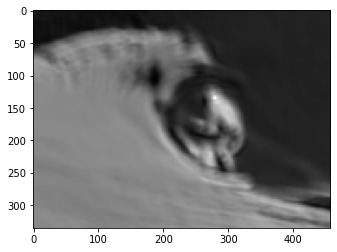

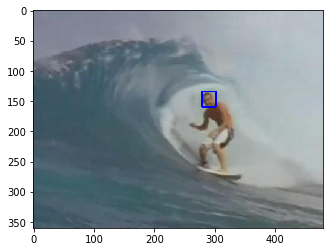

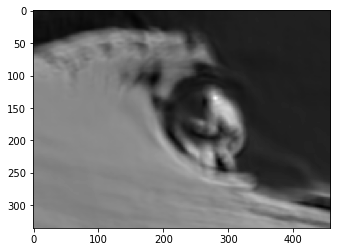

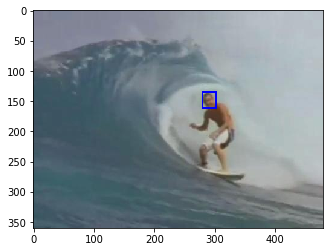

In [95]:
track_object_ncc(SURFER_DATA_PATH, frames[:5], boxes.iloc[0])